## NLP Project

* Research Questions and how NLP can help us to adress these questions?
* Why is this task important?
* Preprocessing
* Data exploration (e.g word clouds)
* Model (start with logistic regression and infer some results --> check text classificaiton problem)
* Try to visualize the result --> not sure about that how to map labels to plane, nned to check
* Evaluate the results by usng proper metric, construct confusion matrices use cross validation to have metric estimation
* Conclusion

In [6]:
# Import libraries
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [7]:
# TODO: Some articles has moret than one label, think about what to do about them?
df = pd.read_csv("../data/train.csv",index_col=0)
df.head(5)

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
ID,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [8]:
df.describe()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# simple preprocessing, TODO: Better work on preprocessing, it's the most important part
def clean_text(text):
    '''reduce text to lower-case lexicon entry'''
    lemmas = [token.lemma_ for token in nlp(text.lower()) 
              if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'}]
    return ' '.join(lemmas)

In [10]:
%time
df["clean_abstract"] = df["ABSTRACT"].apply(clean_text)
df["clean_abstract"].head()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.29 µs


ID
1    predictive model allow subject specific infere...
2    rotation invariance translation invariance hav...
3    introduce develop notion spherical polyharmoni...
4    stochastic landau lifshitz gilbert llg equatio...
5    fouri transform infra red ftir spectra sample ...
Name: clean_abstract, dtype: object

In [11]:
stopwords = set(STOPWORDS)
stopwords.update(["use", "model", "problem", "datum", "give","system","show","result","find","method",
                  "study","approach"])

def plotWordCloud(df : pd.DataFrame, column : str):
    """Given the dataframe and target column plot the wordcloud"""
    
    df_filtered = df[df[column] == 1]
    abstracts = df_filtered["clean_abstract"].values
    text = " ".join(abstract for abstract in abstracts)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.title(column)
    plt.axis("off")
    plt.show
    plt.savefig("../img/"+column+".png")

FileNotFoundError: [Errno 2] No such file or directory: '../img/Computer Science.png'

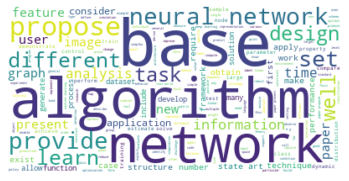

In [14]:
for topic in df.columns[2:-1]:
    plotWordCloud(df, topic)

In [ ]:
# TODO make plotWordCloud function more usable

In [16]:
import os
os.listdir("../")

['.git', 'data', 'LICENSE', 'README.md', 'src']